# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [148]:
#data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


#"""
#DON'T MODIFY ANYTHING IN THIS CELL
#"""
#import helper

#helper.download_extract('mnist', data_dir)
#helper.download_extract('celeba', data_dir)

In [149]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

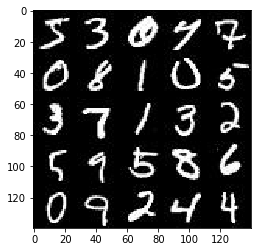

In [150]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

In [ ]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [152]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/RobertDJarvis/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [153]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='real_input_images')
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='z_input')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return real_input_images, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [154]:
from tensorflow.contrib import learn

def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    # new_height = ((input_height - filter_height + 2 * P)/S) + 1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        relu_1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding="same", activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu_1 = tf.maximum(alpha * relu_1, relu_1) 
        relu_1 = tf.nn.dropout(relu_1, 0.85)
        
        #28x28x3    
    
        relu_2 = tf.layers.conv2d(relu_1, 128, 5, strides = 2, padding='same', activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu_2 = tf.layers.batch_normalization(relu_2, training=True)
        relu_2 = tf.maximum(alpha *  relu_2,  relu_2)
        relu_2 = tf.nn.dropout(relu_2, 0.85)
        # 14x14x128
    
        relu_3 = tf.layers.conv2d(relu_2, 256, 5, strides=2, padding='same', activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu_3 = tf.layers.batch_normalization(relu_3, training=True)
        relu_3 = tf.maximum(alpha * relu_3, relu_3)
        relu_3 = tf.nn.dropout(relu_3, 0.85)
        # 7x7x256

        # Flatten it
        flat = tf.reshape(relu_3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
        return out, logits
     


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [155]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse= not is_train):
       
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.85)
 
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, 0.85)
       
    
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, 0.85)
       
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [156]:
def model_loss(input_real, input_z, out_channel_dim, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model= generator(input_z, out_channel_dim)
    d_model_real, d_logits_real= discriminator(input_real)
    d_model_fake, d_logits_fake= discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [157]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):  
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [158]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [159]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    # Inputs
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    samples, losses = [], []
    steps = 0    
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps += 1
                
                # Get images and rescale to pass to D
                batch_images = batch_images*2 

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt , feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})

                                         
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z, lr:learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, lr:learning_rate})

                    print("Epoch {}/{}...".format(e+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
            
                
                if steps % 100 == 0:
                        
                    show_generator_output(sess, 20, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4611... Generator Loss: 3.1460
Epoch 1/2... Discriminator Loss: 0.4263... Generator Loss: 3.3665
Epoch 1/2... Discriminator Loss: 1.2696... Generator Loss: 4.3479
Epoch 1/2... Discriminator Loss: 0.5116... Generator Loss: 2.7023
Epoch 1/2... Discriminator Loss: 0.4274... Generator Loss: 4.9778
Epoch 1/2... Discriminator Loss: 1.6795... Generator Loss: 1.4345
Epoch 1/2... Discriminator Loss: 1.2717... Generator Loss: 1.0821
Epoch 1/2... Discriminator Loss: 1.2351... Generator Loss: 1.2032
Epoch 1/2... Discriminator Loss: 1.2970... Generator Loss: 1.0591
Epoch 1/2... Discriminator Loss: 1.0681... Generator Loss: 1.0190


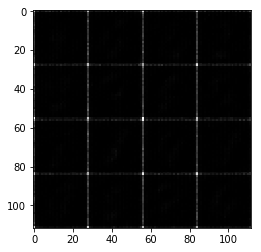

Epoch 1/2... Discriminator Loss: 0.9789... Generator Loss: 1.4418
Epoch 1/2... Discriminator Loss: 1.1795... Generator Loss: 1.2970
Epoch 1/2... Discriminator Loss: 1.3472... Generator Loss: 1.8719
Epoch 1/2... Discriminator Loss: 1.5912... Generator Loss: 1.0304
Epoch 1/2... Discriminator Loss: 1.3978... Generator Loss: 1.2864
Epoch 1/2... Discriminator Loss: 1.2535... Generator Loss: 1.0838
Epoch 1/2... Discriminator Loss: 1.1509... Generator Loss: 2.0172
Epoch 1/2... Discriminator Loss: 1.1903... Generator Loss: 0.9941
Epoch 1/2... Discriminator Loss: 1.1092... Generator Loss: 1.1824
Epoch 1/2... Discriminator Loss: 1.0912... Generator Loss: 1.2662


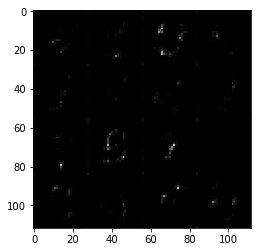

Epoch 1/2... Discriminator Loss: 0.9440... Generator Loss: 1.4170
Epoch 1/2... Discriminator Loss: 1.2234... Generator Loss: 1.1030
Epoch 1/2... Discriminator Loss: 1.3483... Generator Loss: 0.6669
Epoch 1/2... Discriminator Loss: 1.1052... Generator Loss: 0.9779
Epoch 1/2... Discriminator Loss: 0.9610... Generator Loss: 1.2481
Epoch 1/2... Discriminator Loss: 1.0125... Generator Loss: 1.5612
Epoch 1/2... Discriminator Loss: 1.0122... Generator Loss: 1.6949
Epoch 1/2... Discriminator Loss: 1.2095... Generator Loss: 0.8783
Epoch 1/2... Discriminator Loss: 1.2463... Generator Loss: 0.7390
Epoch 1/2... Discriminator Loss: 0.9441... Generator Loss: 1.3617


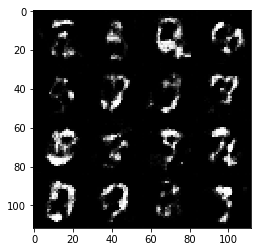

Epoch 1/2... Discriminator Loss: 0.9383... Generator Loss: 1.1505
Epoch 1/2... Discriminator Loss: 0.9934... Generator Loss: 1.4098
Epoch 1/2... Discriminator Loss: 0.8737... Generator Loss: 1.4405
Epoch 1/2... Discriminator Loss: 1.1248... Generator Loss: 1.5169
Epoch 1/2... Discriminator Loss: 0.9889... Generator Loss: 1.6454
Epoch 1/2... Discriminator Loss: 0.8916... Generator Loss: 1.5421
Epoch 1/2... Discriminator Loss: 1.0356... Generator Loss: 1.0727
Epoch 1/2... Discriminator Loss: 1.1265... Generator Loss: 0.9016
Epoch 1/2... Discriminator Loss: 1.1039... Generator Loss: 1.5327
Epoch 1/2... Discriminator Loss: 1.1894... Generator Loss: 1.1329


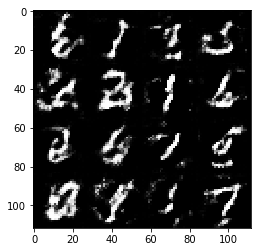

Epoch 1/2... Discriminator Loss: 1.0148... Generator Loss: 1.5943
Epoch 1/2... Discriminator Loss: 0.9681... Generator Loss: 1.4473
Epoch 1/2... Discriminator Loss: 1.1699... Generator Loss: 1.7425
Epoch 1/2... Discriminator Loss: 1.0099... Generator Loss: 1.4482
Epoch 1/2... Discriminator Loss: 0.9476... Generator Loss: 1.7686
Epoch 1/2... Discriminator Loss: 1.0932... Generator Loss: 1.2036
Epoch 1/2... Discriminator Loss: 1.2357... Generator Loss: 1.2851
Epoch 1/2... Discriminator Loss: 1.1168... Generator Loss: 1.4384
Epoch 1/2... Discriminator Loss: 1.2259... Generator Loss: 1.3272
Epoch 1/2... Discriminator Loss: 1.2516... Generator Loss: 1.2971


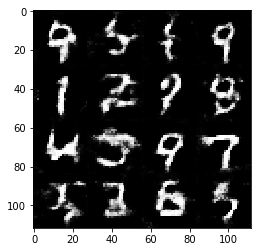

Epoch 1/2... Discriminator Loss: 1.6569... Generator Loss: 1.8950
Epoch 1/2... Discriminator Loss: 1.3100... Generator Loss: 0.7144
Epoch 1/2... Discriminator Loss: 1.2388... Generator Loss: 1.4196
Epoch 1/2... Discriminator Loss: 1.0882... Generator Loss: 1.1173
Epoch 1/2... Discriminator Loss: 1.1015... Generator Loss: 0.9413
Epoch 1/2... Discriminator Loss: 1.1513... Generator Loss: 0.8044
Epoch 1/2... Discriminator Loss: 1.3284... Generator Loss: 0.6945
Epoch 1/2... Discriminator Loss: 1.2252... Generator Loss: 0.9010
Epoch 1/2... Discriminator Loss: 1.1020... Generator Loss: 1.1563
Epoch 1/2... Discriminator Loss: 1.0887... Generator Loss: 1.3084


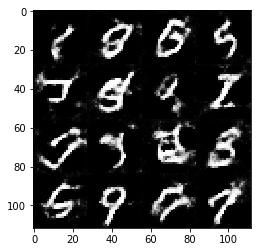

Epoch 1/2... Discriminator Loss: 1.0867... Generator Loss: 1.1198
Epoch 1/2... Discriminator Loss: 1.1333... Generator Loss: 1.2571
Epoch 1/2... Discriminator Loss: 1.1127... Generator Loss: 0.9857
Epoch 1/2... Discriminator Loss: 1.1492... Generator Loss: 1.5839
Epoch 1/2... Discriminator Loss: 1.2039... Generator Loss: 1.1263
Epoch 1/2... Discriminator Loss: 1.1500... Generator Loss: 1.1268
Epoch 1/2... Discriminator Loss: 1.0980... Generator Loss: 1.1475
Epoch 1/2... Discriminator Loss: 1.2792... Generator Loss: 1.0722
Epoch 1/2... Discriminator Loss: 1.1082... Generator Loss: 1.2215
Epoch 1/2... Discriminator Loss: 1.2578... Generator Loss: 0.8636


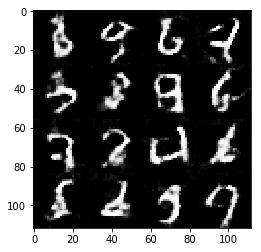

Epoch 1/2... Discriminator Loss: 1.0238... Generator Loss: 1.0778
Epoch 1/2... Discriminator Loss: 1.1102... Generator Loss: 0.9780
Epoch 1/2... Discriminator Loss: 1.1285... Generator Loss: 1.2667
Epoch 1/2... Discriminator Loss: 1.0048... Generator Loss: 1.1418
Epoch 1/2... Discriminator Loss: 1.2040... Generator Loss: 1.8110
Epoch 1/2... Discriminator Loss: 1.0791... Generator Loss: 1.0318
Epoch 1/2... Discriminator Loss: 1.1478... Generator Loss: 1.5461
Epoch 1/2... Discriminator Loss: 1.1470... Generator Loss: 0.8842
Epoch 1/2... Discriminator Loss: 1.1823... Generator Loss: 0.9767
Epoch 1/2... Discriminator Loss: 1.1974... Generator Loss: 0.8553


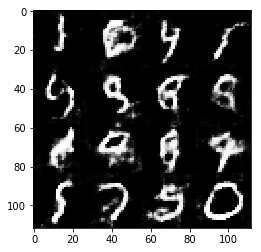

Epoch 1/2... Discriminator Loss: 1.1238... Generator Loss: 0.9930
Epoch 1/2... Discriminator Loss: 1.1542... Generator Loss: 0.8925
Epoch 1/2... Discriminator Loss: 1.1059... Generator Loss: 1.2529
Epoch 1/2... Discriminator Loss: 1.0050... Generator Loss: 1.7725
Epoch 1/2... Discriminator Loss: 1.0746... Generator Loss: 1.5712
Epoch 1/2... Discriminator Loss: 1.3255... Generator Loss: 0.8192
Epoch 1/2... Discriminator Loss: 1.2957... Generator Loss: 1.0862
Epoch 1/2... Discriminator Loss: 1.0838... Generator Loss: 1.3253
Epoch 1/2... Discriminator Loss: 1.0218... Generator Loss: 1.2385
Epoch 1/2... Discriminator Loss: 1.0438... Generator Loss: 1.4303


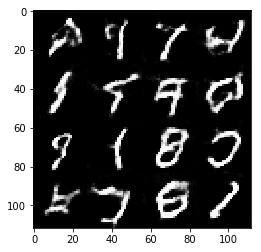

Epoch 1/2... Discriminator Loss: 1.0686... Generator Loss: 1.1957
Epoch 1/2... Discriminator Loss: 1.1612... Generator Loss: 1.1045
Epoch 1/2... Discriminator Loss: 1.3218... Generator Loss: 0.7341
Epoch 2/2... Discriminator Loss: 0.9997... Generator Loss: 1.2355
Epoch 2/2... Discriminator Loss: 1.1940... Generator Loss: 1.0158
Epoch 2/2... Discriminator Loss: 1.1320... Generator Loss: 1.0772
Epoch 2/2... Discriminator Loss: 1.1395... Generator Loss: 1.2679
Epoch 2/2... Discriminator Loss: 1.2128... Generator Loss: 1.4681
Epoch 2/2... Discriminator Loss: 1.2188... Generator Loss: 1.1098
Epoch 2/2... Discriminator Loss: 1.1553... Generator Loss: 0.9966
Epoch 2/2... Discriminator Loss: 1.1974... Generator Loss: 1.0812
Epoch 2/2... Discriminator Loss: 1.0987... Generator Loss: 1.2177
Epoch 2/2... Discriminator Loss: 1.1619... Generator Loss: 1.0443


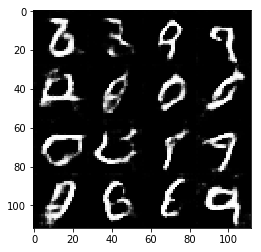

Epoch 2/2... Discriminator Loss: 1.0480... Generator Loss: 1.0005
Epoch 2/2... Discriminator Loss: 1.1097... Generator Loss: 1.4241
Epoch 2/2... Discriminator Loss: 1.0743... Generator Loss: 1.4628
Epoch 2/2... Discriminator Loss: 1.0443... Generator Loss: 1.2844
Epoch 2/2... Discriminator Loss: 1.1344... Generator Loss: 0.8114
Epoch 2/2... Discriminator Loss: 1.0825... Generator Loss: 1.1842
Epoch 2/2... Discriminator Loss: 1.0352... Generator Loss: 1.1653
Epoch 2/2... Discriminator Loss: 1.0346... Generator Loss: 1.1786
Epoch 2/2... Discriminator Loss: 1.0963... Generator Loss: 1.2632
Epoch 2/2... Discriminator Loss: 1.0998... Generator Loss: 0.9938


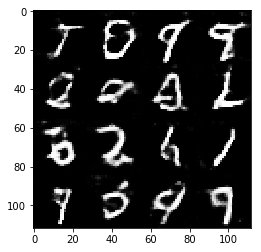

Epoch 2/2... Discriminator Loss: 1.1184... Generator Loss: 1.7202
Epoch 2/2... Discriminator Loss: 1.0642... Generator Loss: 1.1351
Epoch 2/2... Discriminator Loss: 1.2229... Generator Loss: 0.9919
Epoch 2/2... Discriminator Loss: 1.2079... Generator Loss: 1.0780
Epoch 2/2... Discriminator Loss: 1.0189... Generator Loss: 1.0370
Epoch 2/2... Discriminator Loss: 1.0481... Generator Loss: 1.1967
Epoch 2/2... Discriminator Loss: 1.1473... Generator Loss: 1.3593
Epoch 2/2... Discriminator Loss: 1.1097... Generator Loss: 1.1004
Epoch 2/2... Discriminator Loss: 1.0842... Generator Loss: 1.0269
Epoch 2/2... Discriminator Loss: 1.0900... Generator Loss: 1.0774


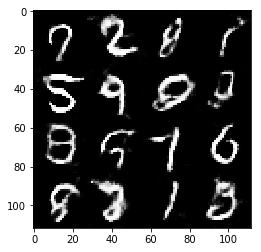

Epoch 2/2... Discriminator Loss: 1.1298... Generator Loss: 1.1677
Epoch 2/2... Discriminator Loss: 1.1887... Generator Loss: 1.3911
Epoch 2/2... Discriminator Loss: 1.1232... Generator Loss: 1.3884
Epoch 2/2... Discriminator Loss: 1.0098... Generator Loss: 1.3082
Epoch 2/2... Discriminator Loss: 1.1052... Generator Loss: 1.2216
Epoch 2/2... Discriminator Loss: 1.0725... Generator Loss: 1.1931
Epoch 2/2... Discriminator Loss: 1.1052... Generator Loss: 1.2316
Epoch 2/2... Discriminator Loss: 0.9894... Generator Loss: 1.6064
Epoch 2/2... Discriminator Loss: 1.0472... Generator Loss: 1.1874
Epoch 2/2... Discriminator Loss: 1.1058... Generator Loss: 1.0014


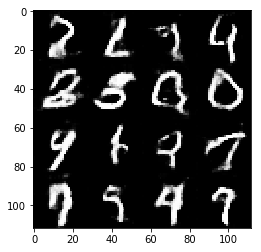

Epoch 2/2... Discriminator Loss: 1.1840... Generator Loss: 1.6286
Epoch 2/2... Discriminator Loss: 1.0308... Generator Loss: 1.0180
Epoch 2/2... Discriminator Loss: 1.1948... Generator Loss: 1.7621
Epoch 2/2... Discriminator Loss: 0.9168... Generator Loss: 1.1681
Epoch 2/2... Discriminator Loss: 1.0071... Generator Loss: 1.0029
Epoch 2/2... Discriminator Loss: 1.1788... Generator Loss: 1.6422
Epoch 2/2... Discriminator Loss: 1.0177... Generator Loss: 1.1258
Epoch 2/2... Discriminator Loss: 1.1749... Generator Loss: 0.8878
Epoch 2/2... Discriminator Loss: 1.0753... Generator Loss: 1.1243
Epoch 2/2... Discriminator Loss: 0.9735... Generator Loss: 1.1475


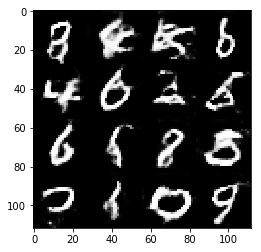

Epoch 2/2... Discriminator Loss: 1.2255... Generator Loss: 0.9212
Epoch 2/2... Discriminator Loss: 1.0608... Generator Loss: 1.5651
Epoch 2/2... Discriminator Loss: 1.1047... Generator Loss: 1.1317
Epoch 2/2... Discriminator Loss: 1.0072... Generator Loss: 1.0713
Epoch 2/2... Discriminator Loss: 1.1685... Generator Loss: 0.8391
Epoch 2/2... Discriminator Loss: 1.1130... Generator Loss: 1.1893
Epoch 2/2... Discriminator Loss: 1.1932... Generator Loss: 0.9312
Epoch 2/2... Discriminator Loss: 1.1711... Generator Loss: 0.8095
Epoch 2/2... Discriminator Loss: 1.0853... Generator Loss: 0.9814
Epoch 2/2... Discriminator Loss: 1.0785... Generator Loss: 1.3051


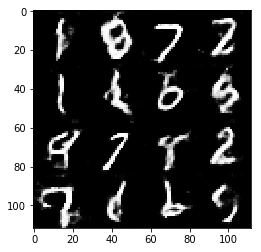

Epoch 2/2... Discriminator Loss: 1.1848... Generator Loss: 1.3320
Epoch 2/2... Discriminator Loss: 1.0300... Generator Loss: 1.7852
Epoch 2/2... Discriminator Loss: 1.0428... Generator Loss: 0.9974
Epoch 2/2... Discriminator Loss: 0.9989... Generator Loss: 1.3244
Epoch 2/2... Discriminator Loss: 1.0656... Generator Loss: 0.9997
Epoch 2/2... Discriminator Loss: 1.0410... Generator Loss: 1.2698
Epoch 2/2... Discriminator Loss: 1.1264... Generator Loss: 1.4659
Epoch 2/2... Discriminator Loss: 1.1728... Generator Loss: 1.2512
Epoch 2/2... Discriminator Loss: 1.0381... Generator Loss: 1.2116
Epoch 2/2... Discriminator Loss: 1.1573... Generator Loss: 1.5112


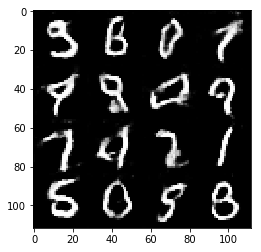

Epoch 2/2... Discriminator Loss: 1.0236... Generator Loss: 1.3890
Epoch 2/2... Discriminator Loss: 1.1185... Generator Loss: 0.9168
Epoch 2/2... Discriminator Loss: 1.2274... Generator Loss: 0.6985
Epoch 2/2... Discriminator Loss: 0.9693... Generator Loss: 1.6164
Epoch 2/2... Discriminator Loss: 1.0052... Generator Loss: 1.2523
Epoch 2/2... Discriminator Loss: 1.2471... Generator Loss: 0.9037
Epoch 2/2... Discriminator Loss: 1.0927... Generator Loss: 1.4376
Epoch 2/2... Discriminator Loss: 1.2494... Generator Loss: 0.8780
Epoch 2/2... Discriminator Loss: 1.0551... Generator Loss: 0.8530
Epoch 2/2... Discriminator Loss: 1.0329... Generator Loss: 1.2343


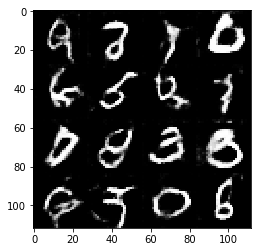

Epoch 2/2... Discriminator Loss: 1.0368... Generator Loss: 1.2402
Epoch 2/2... Discriminator Loss: 0.9253... Generator Loss: 1.2378
Epoch 2/2... Discriminator Loss: 1.0739... Generator Loss: 1.6698
Epoch 2/2... Discriminator Loss: 0.7274... Generator Loss: 1.7844
Epoch 2/2... Discriminator Loss: 0.9396... Generator Loss: 1.8069
Epoch 2/2... Discriminator Loss: 1.2379... Generator Loss: 0.9572
Epoch 2/2... Discriminator Loss: 1.2417... Generator Loss: 0.8750
Epoch 2/2... Discriminator Loss: 1.1768... Generator Loss: 1.0178
Epoch 2/2... Discriminator Loss: 1.0240... Generator Loss: 1.4902
Epoch 2/2... Discriminator Loss: 1.0194... Generator Loss: 1.4557


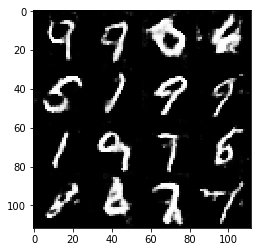

Epoch 2/2... Discriminator Loss: 1.0299... Generator Loss: 1.0331
Epoch 2/2... Discriminator Loss: 1.0736... Generator Loss: 1.0762
Epoch 2/2... Discriminator Loss: 0.9156... Generator Loss: 1.3563


In [160]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.6310... Generator Loss: 2.7178
Epoch 1/1... Discriminator Loss: 0.4625... Generator Loss: 3.1042
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.7350
Epoch 1/1... Discriminator Loss: 0.4215... Generator Loss: 5.2023
Epoch 1/1... Discriminator Loss: 0.4166... Generator Loss: 4.0218
Epoch 1/1... Discriminator Loss: 0.4438... Generator Loss: 3.2669
Epoch 1/1... Discriminator Loss: 0.3745... Generator Loss: 5.2017
Epoch 1/1... Discriminator Loss: 0.6626... Generator Loss: 3.6920
Epoch 1/1... Discriminator Loss: 1.0107... Generator Loss: 3.6812
Epoch 1/1... Discriminator Loss: 0.6835... Generator Loss: 2.1340


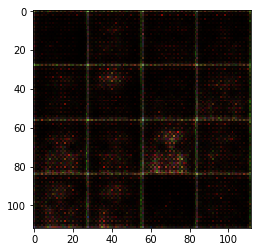

Epoch 1/1... Discriminator Loss: 0.6479... Generator Loss: 1.9431
Epoch 1/1... Discriminator Loss: 0.4965... Generator Loss: 3.1763
Epoch 1/1... Discriminator Loss: 0.4808... Generator Loss: 4.0802
Epoch 1/1... Discriminator Loss: 0.6594... Generator Loss: 1.8780
Epoch 1/1... Discriminator Loss: 0.5872... Generator Loss: 2.1145
Epoch 1/1... Discriminator Loss: 0.4180... Generator Loss: 3.7875
Epoch 1/1... Discriminator Loss: 0.5850... Generator Loss: 2.2320
Epoch 1/1... Discriminator Loss: 0.7157... Generator Loss: 1.5822
Epoch 1/1... Discriminator Loss: 0.5065... Generator Loss: 2.4857
Epoch 1/1... Discriminator Loss: 0.4452... Generator Loss: 3.0351


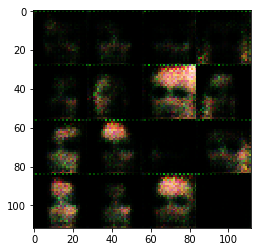

Epoch 1/1... Discriminator Loss: 0.4937... Generator Loss: 3.3908
Epoch 1/1... Discriminator Loss: 0.5202... Generator Loss: 2.9695
Epoch 1/1... Discriminator Loss: 0.5223... Generator Loss: 3.1431
Epoch 1/1... Discriminator Loss: 0.4610... Generator Loss: 3.0987
Epoch 1/1... Discriminator Loss: 0.6200... Generator Loss: 2.0168
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 4.5351
Epoch 1/1... Discriminator Loss: 1.2681... Generator Loss: 4.2109
Epoch 1/1... Discriminator Loss: 0.8084... Generator Loss: 1.5116
Epoch 1/1... Discriminator Loss: 0.8528... Generator Loss: 1.3754
Epoch 1/1... Discriminator Loss: 0.7141... Generator Loss: 3.1930


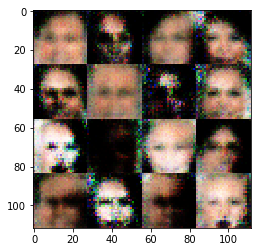

Epoch 1/1... Discriminator Loss: 0.8396... Generator Loss: 2.8403
Epoch 1/1... Discriminator Loss: 0.8338... Generator Loss: 4.0277
Epoch 1/1... Discriminator Loss: 0.8819... Generator Loss: 3.2766
Epoch 1/1... Discriminator Loss: 0.6580... Generator Loss: 2.4900
Epoch 1/1... Discriminator Loss: 0.8137... Generator Loss: 1.5558
Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 0.9697
Epoch 1/1... Discriminator Loss: 1.0729... Generator Loss: 0.8971
Epoch 1/1... Discriminator Loss: 0.9499... Generator Loss: 2.4494
Epoch 1/1... Discriminator Loss: 0.9296... Generator Loss: 1.7703
Epoch 1/1... Discriminator Loss: 0.7709... Generator Loss: 2.2375


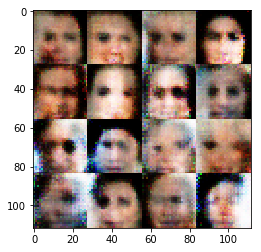

In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.